In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df=pd.read_csv(r"C:\Users\hp\Downloads\adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.shape

(48842, 15)

In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

The above dataset uses the string "?" to represent missing values in some categorical columns. However, since "?" is not recognized as a missing value (NaN) by default in pandas, these values must be explicitly handled during preprocessing.

In [7]:
# Replace this  "?" with proper NaN
df.replace("?", pd.NA, inplace=True)


In [8]:
# This returns the total number of missing (NaN) values in the entire DataFrame
df.isnull().sum().sum()


6465

In [9]:
# Deleting non-useful columns
df.drop(columns=['fnlwgt', 'education'], inplace=True)



In [10]:
# Fill missing values in selected categorical columns with their most frequent value (mode)
# This avoids data loss while handling NaNs and is compatible with future versions of pandas
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
# Convert the target column to binary
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


In [12]:
# Identify categorical columns except the target column 'income'
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')


In [13]:
# One-hot encode categorical columns to convert them into numeric format
categorical_cols = df.select_dtypes(include='object').columns
df_2 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_2.head()


,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,18,10,0,0,30,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


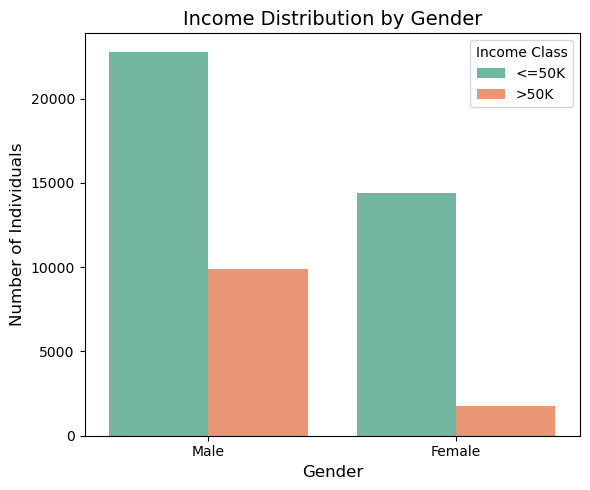

In [30]:

# Plot showing how income is distributed across genders
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='gender', hue='income', palette='Set2')
plt.title("Income Distribution by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
# Customize legend (0 = <=50K, 1 = >50K)
plt.legend(title='Income Class', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()



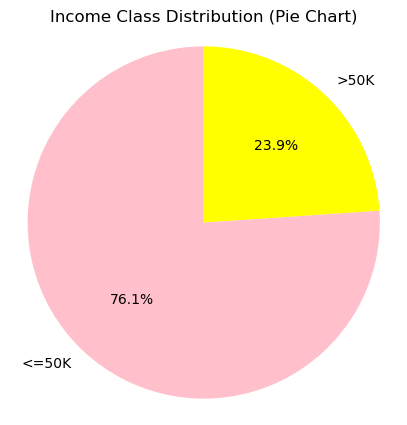

In [15]:
# Pie chart to show proportion of income classes
# Gives a better visual idea of imbalance between classes
income_counts = df['income'].value_counts()
labels = ['<=50K', '>50K']
plt.figure(figsize=(5,5))
plt.pie(income_counts, labels=labels, autopct='%2.1f%%', startangle=90, colors=['pink', 'yellow'])
plt.title('Income Class Distribution (Pie Chart)')
plt.axis('equal')  # This ensures pie is a circle
plt.show()

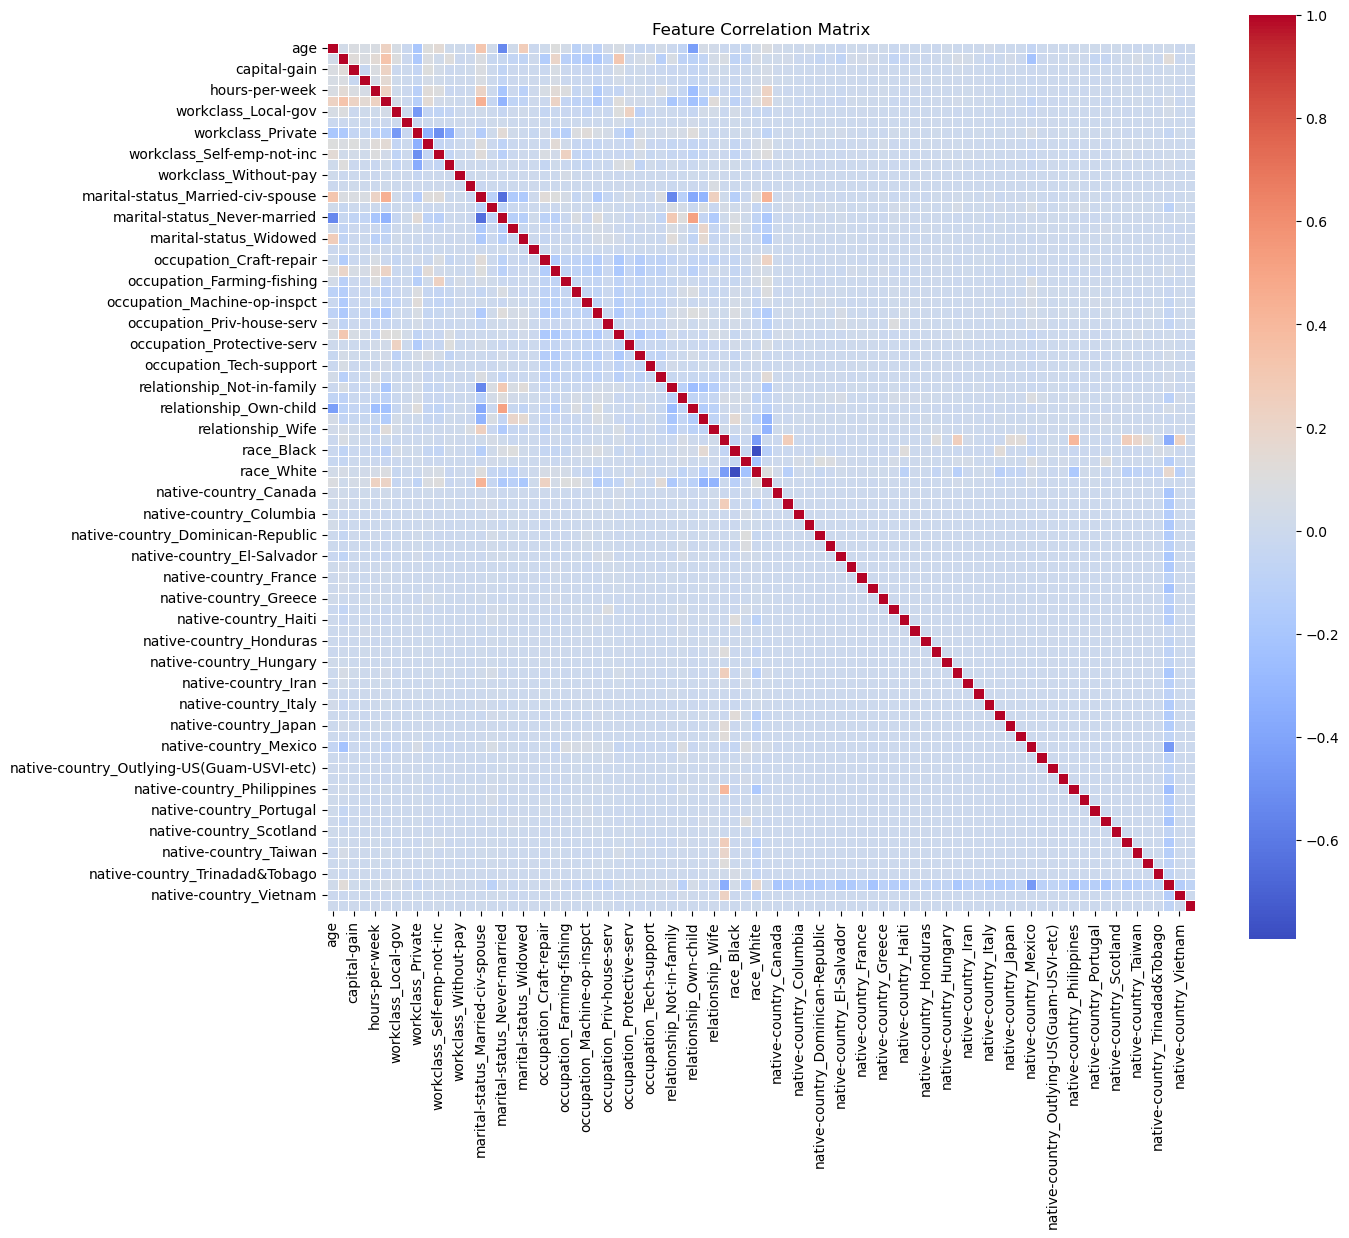

In [20]:
# Display correlation matrix as heatmap for all numeric features
# Helps detect which features are strongly related to each other or the targe
plt.figure(figsize=(14,12))
sns.heatmap(df_2.corr(),cmap="coolwarm", square=True, linewidths=0.6)
plt.title("Feature Correlation Matrix")
plt.show()

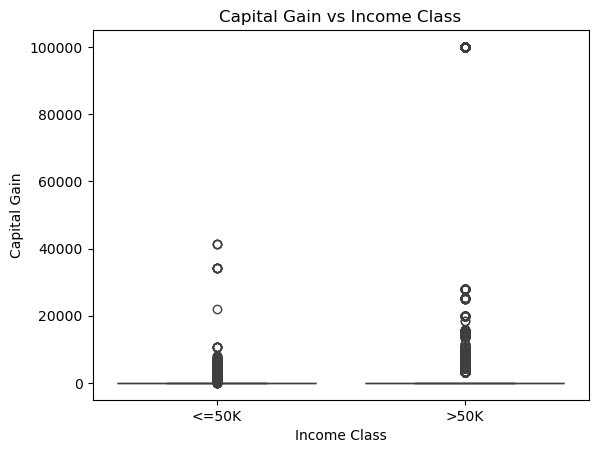

In [26]:
# Boxplot of capital gain grouped by income
# Shows how income class affects capital gains
sns.boxplot(x='income', y='capital-gain', data=df_2)
plt.title('Capital Gain vs Income Class')
plt.xlabel('Income Class')
plt.ylabel('Capital Gain')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()




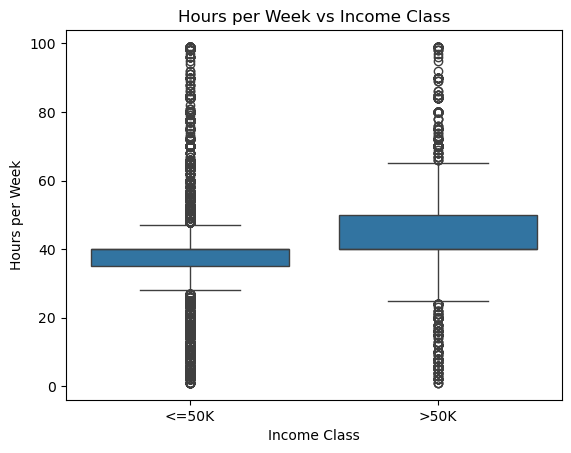

In [29]:
# Boxplot of hours-per-week grouped by income
# Helps understand if higher earners tend to work more hours
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week vs Income Class')
plt.xlabel('Income Class')
plt.ylabel('Hours per Week')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

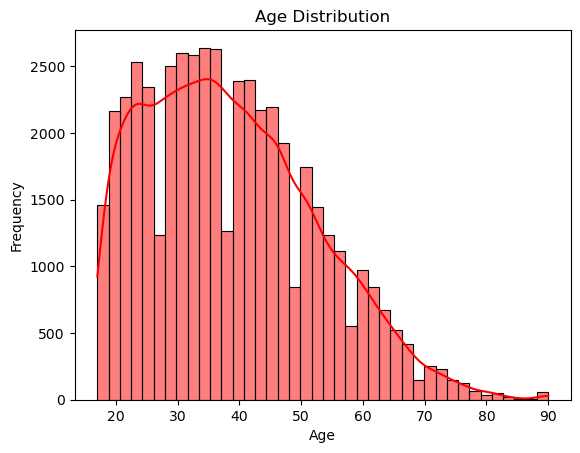

In [28]:
# Plot distribution of age in the dataset
# Helps understand age demographics of the dataset
sns.histplot(df['age'], kde=True, bins=40, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
